# Formula 1 Data Analysis and Model Building
This notebook covers the following:
1. Exploratory Data Analysis (EDA)
2. Data Preprocessing
3. Model Training and Evaluation
4. Feature Importance and Insights
5. Model Saving


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from sklearn.preprocessing import LabelEncoder

## 1. Load Data

In [12]:
# Load the dataset
data = pd.read_csv("data.csv")
data.head()

,raceId,year,round,circuitId,driverId,constructorId,pit_stop_time,positionOrder,grid,points,laps,statusId
0,900,2014,1,1,3,131,23673.0,1,3,25.0,57,1
1,900,2014,1,1,3,131,24331.0,1,3,25.0,57,1
2,900,2014,1,1,4,6,21978.0,4,5,12.0,57,1
3,900,2014,1,1,4,6,22887.0,4,5,12.0,57,1
4,900,2014,1,1,8,6,21825.0,7,11,6.0,57,1


## 2. Exploratory Data Analysis (EDA)

In [13]:
# Overview of the dataset
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7979 entries, 0 to 7978
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   raceId         7979 non-null   int64  
 1   year           7979 non-null   int64  
 2   round          7979 non-null   int64  
 3   circuitId      7979 non-null   int64  
 4   driverId       7979 non-null   int64  
 5   constructorId  7979 non-null   int64  
 6   pit_stop_time  7979 non-null   float64
 7   positionOrder  7979 non-null   int64  
 8   grid           7979 non-null   int64  
 9   points         7979 non-null   float64
 10  laps           7979 non-null   int64  
 11  statusId       7979 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 748.2 KB
None
            raceId         year        round    circuitId     driverId  \
count  7979.000000  7979.000000  7979.000000  7979.000000  7979.000000   
mean   1016.396917  2018.816769    10.539291    25.890588   622.942850 

## 3. Data Preprocessing

In [15]:
#Fill missing values
data.fillna(data.mean(), inplace=True)


## 4. Model Training and Evaluation

In [20]:
# Create the target variable (winner)
data['winner'] = (data['positionOrder'] == 1).astype(int)

# Select features and target
features = ['circuitId', 'driverId', 'constructorId', 'grid', 'pit_stop_time']
X = data[features]
y = data['winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    class_weight='balanced'  # For handling class imbalance
)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1526
           1       0.39      0.86      0.54        70

    accuracy                           0.94      1596
   macro avg       0.69      0.90      0.75      1596
weighted avg       0.97      0.94      0.95      1596


Model Accuracy: 0.94

Confusion Matrix:
[[1434   92]
 [  10   60]]


## 5. Feature Importance and Insights

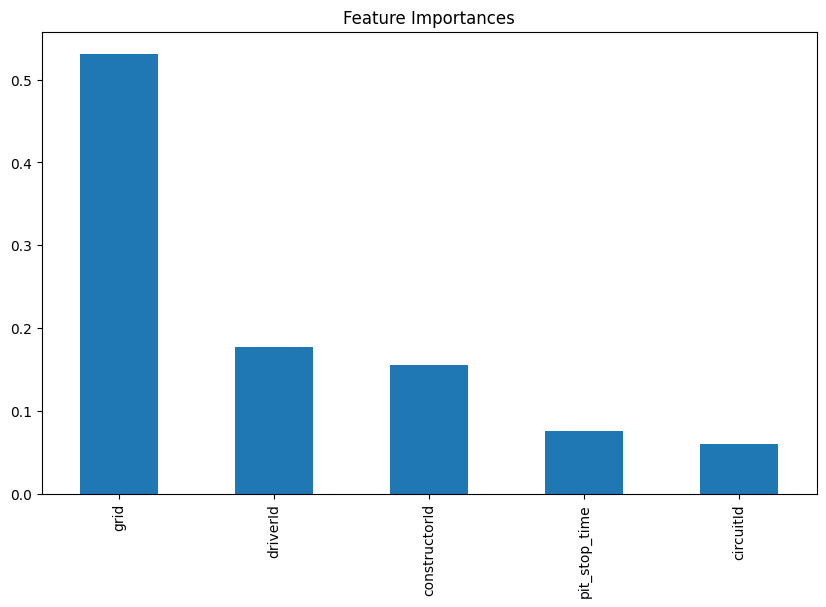

In [21]:
# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()

## 6. Save the Model

In [22]:
# Save the trained model
joblib.dump(model, '../app/models/race_outcome_model.pkl')
print("\nModel saved as '../app/models/race_outcome_model.pkl'")



Model saved as '../app/models/race_outcome_model.pkl'
